# Confidence Interval of Median: Spread

This example shows how the spread of confidence interval of median changes with respect number of samples and confidence levels.

Text(0.5, 1.0, 'Size of confidence interval of median')

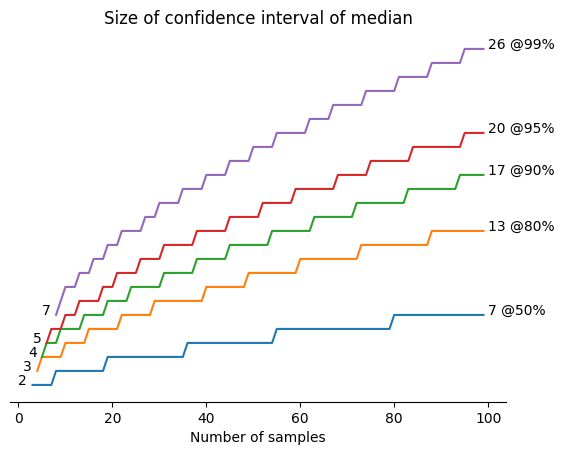

In [1]:
import matplotlib.pyplot as plt
from relistats.intervals import percentile_interval_locs

confidence_levels = (50, 80, 90, 95, 99)

x_ax = range(3, 100)

ax = plt.subplot(111)

for c in confidence_levels:
    ci_bounds = [percentile_interval_locs(n, 0.5, c/100) for n in x_ax]
    ci_size = [y[1] - y[0] if y is not None else None for y in ci_bounds]
    
    ax.plot(x_ax, ci_size)

    xy = (x_ax[-1], ci_size[-1])
    xy_text = (xy[0] + 1, xy[1])
    ax.annotate(f"{ci_size[-1]} @{c}%", xy=xy, xytext=xy_text)

    k = 0
    while ci_size[k] is None:
        k += 1
    xy = (x_ax[k], ci_size[k])
    xy_text = (xy[0]-3, xy[1])
    ax.annotate(ci_size[k], xy=xy, xytext=xy_text)

ax.spines[['left', 'right', 'top']].set_visible(False)
ax.tick_params(left = False)
ax.yaxis.set_tick_params(labelleft=False)
ax.set_xlabel("Number of samples")
ax.set_title("Size of confidence interval of median")




(-0.047711356141979855, 0.0917607765355023) 0.13947213267748215


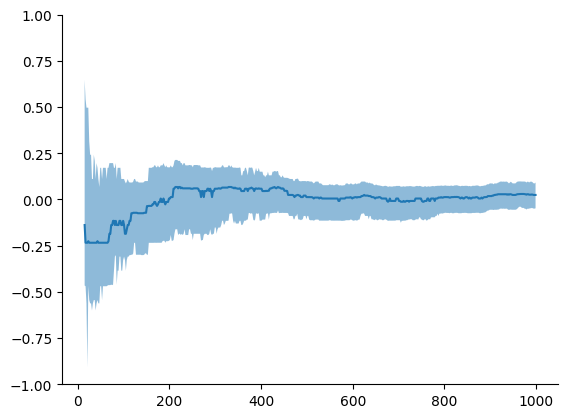

In [2]:
import numpy as np
import scipy.stats as stats
from relistats.intervals import confidence_interval_of_median

np.random.seed(42)
y = stats.norm.rvs(size=1000)

x_ax = range(15, len(y), 2)
upper = []
lower = []
central = []

cc = 0.95

for x in x_ax:
    y1 = sorted(y[:x])
    #print(y1)
    central.append(y1[(x-1)//2])
    ci = confidence_interval_of_median(cc, y1)
    lower.append(ci[0])
    upper.append(ci[1])

ax = plt.subplot(111)
ax.plot(x_ax, central)
ax.fill_between(x_ax, lower, upper, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)
ax.set_ylim([-1, 1])
print(ci, ci[1]-ci[0])

0.07949134084088404 -0.0419348382563611 0.12142617909724514


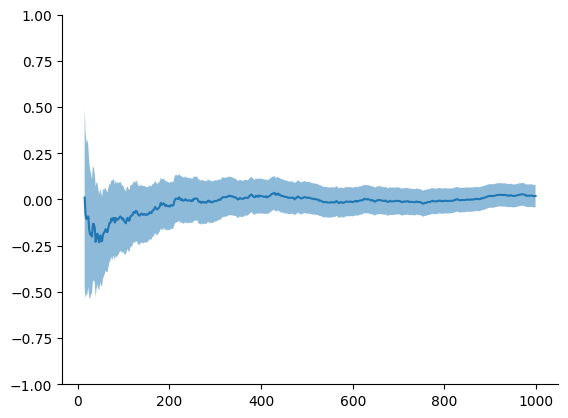

In [4]:
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

np.random.seed(42)
y = stats.norm.rvs(size=1000)

x_ax = range(15, len(y), 2)
upper = []
lower = []
central = []

cc = 0.95

for x in x_ax:
    y1 = sorted(y[:x])
    #print(y1)
    mean = sum(y1)/len(y1)
    central.append(mean)
    calc_stderr = np.std(y1)/math.sqrt(len(y1))
    lower.append(mean - 1.96*calc_stderr)
    upper.append(mean + 1.96*calc_stderr)

ax = plt.subplot(111)
ax.plot(x_ax, central)
ax.fill_between(x_ax, lower, upper, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)
ax.set_ylim([-1, 1])
print(upper[-1], lower[-1], upper[-1]-lower[-1])

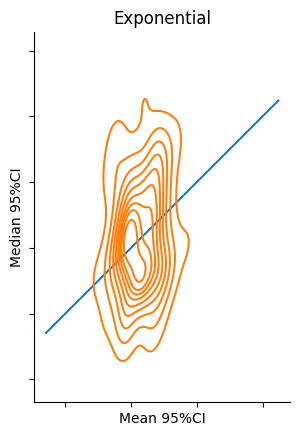

In [3]:
import scipy.stats as stats
import numpy as np
import math
from relistats.intervals import confidence_interval_of_median
import seaborn as sns

def means_vs_medians(name, dist) -> None:
    n_iter = 100
    n_samples = 1000

    mean_ci = []
    median_ci = []

    for _ in range(n_iter):
        #y = stats.maxwell.rvs(size=1000)         
        #y = stats.triang(c=0).rvs(size=1000)
        #y = stats.rayleigh.rvs(size=1000)
        y = dist.rvs(size=n_samples)
        #y = stats.norm.rvs(size=n_samples)
        #y = stats.uniform.rvs(size=n_samples)

        median_95ci = confidence_interval_of_median(0.95, y)
        calc_mean = sum(y)/len(y)
        calc_stderr = np.std(y)/math.sqrt(len(y))
        mean_95ci_size = 2*1.96*calc_stderr
        median_95ci_size = median_95ci[1] - median_95ci[0]
        mean_ci.append(mean_95ci_size)
        median_ci.append(median_95ci_size)

    #plt.scatter(mean_ci, median_ci)
    max_mean = max(mean_ci)
    max_median = max(median_ci)
    max_max = max(max_mean, max_median)
    min_min = min(min(mean_ci), min(median_ci))
    sns.lineplot(x=[min_min, max_max], y=[min_min, max_max])
    ax = sns.kdeplot(x=mean_ci, y=median_ci)

    ax.spines[['right', 'top']].set_visible(False)
    ax.yaxis.set_tick_params(labelleft=False)
    ax.xaxis.set_tick_params(labelbottom=False)
    ax.set_xlabel("Mean 95%CI")
    ax.set_ylabel("Median 95%CI")
    ax.set_title(name)
    ax.set_aspect('equal')

means_vs_medians("Exponential", stats.expon)

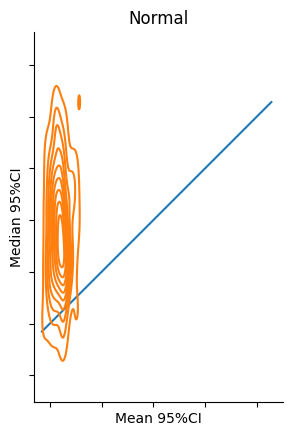

In [2]:
means_vs_medians("Normal", stats.norm)

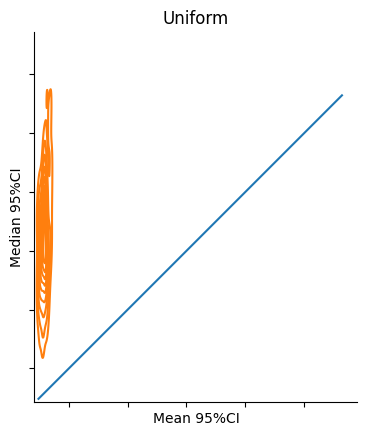

In [3]:
means_vs_medians("Uniform", stats.uniform)

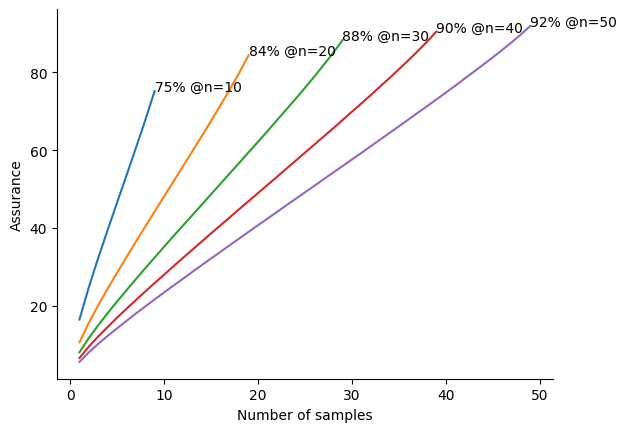

In [5]:
import matplotlib.pyplot as plt
from relistats.percentile import assurance_in_percentile

for n in range (10, 51, 10):
    x_ax = range(1,n)
    aa = [assurance_in_percentile(j, n)*100 for j in x_ax]
    plt.plot(x_ax, aa)
    plt.annotate(f"{aa[-1]:.0f}% @n={n}", (x_ax[-1], aa[-1]))

plt.xlabel("Number of samples")
plt.ylabel("Assurance")
plt.gca().spines[['right', 'top']].set_visible(False)

